Data Processing for Flurometer (for Chlorophyll Concentration)

In [65]:
import numpy as np
from numpy import genfromtxt
import ciso8601
import time
import datetime
import json
import pandas as pd
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll

In [60]:
fluoro_timestamp = genfromtxt('uwu.txt', dtype='str',delimiter='\t')
fluoro_data = genfromtxt('uwu.txt',delimiter='\t')
timestamp = fluoro_timestamp[:,0]
raw_fluoro = fluoro_data[:,5]
proc_fluoro = []
unix_time = []
#Calibration data according to manufacturer 
scale = 0.0073
dark_count = 45
#Extract fluoroescence count and convert to chlorophyll concentration, then convert date to unix epoch
for item in raw_fluoro:
    proc_val = scale*(item-dark_count)
    proc_fluoro.append(proc_val)
for timeuwu in timestamp:
    s = timeuwu.split(',')
    ss = s[0].split('.')
    ts = ciso8601.parse_datetime(s[0])
    bruh = time.mktime(ts.timetuple())
    
    
    bruh_int = int(bruh)
    unix_time.append(bruh_int)
    print(bruh_int)



1736280000
1736280002
1736280003
1736280004
1736280005
1736280006
1736280007
1736280008
1736280009
1736280010
1736280011
1736280012
1736280013
1736280014
1736280015
1736280016
1736280017
1736280019
1736280020
1736280021
1736280022
1736280023
1736280024
1736280025
1736280026
1736280027
1736280028
1736280029
1736280030
1736280031
1736280032
1736280033
1736280035
1736280036
1736280037
1736280038
1736280039
1736280040
1736280041
1736280042
1736280043
1736280044
1736280045
1736280046
1736280047
1736280048
1736280049
1736280050
1736280052
1736280053
1736280054
1736280055
1736280056
1736280057
1736280058
1736280059
1736280060
1736280061
1736280062
1736280063
1736280064
1736280065
1736280066
1736280068
1736280069
1736280070
1736280071
1736280072
1736280073
1736280074
1736280075
1736280076
1736280077
1736280078
1736280079
1736280080
1736280081
1736280082
1736280083
1736280085
1736280086
1736280087
1736280088
1736280089
1736280090
1736280091
1736280092
1736280093
1736280094
1736280095
1736280096

Plot chlorophyll concentration along transect

In [64]:
#Obtain coordinate data from JSON file
# Load the JSON file
with open('seapath.json', 'r') as file:
    data = json.load(file)

# Extract coordinates
coordinates = data['features'][0]['geometry']['coordinates']
time = data['features'][0]['properties']['coordTimes']
# Separate longitude and latitude
longitudes = [coord[0] for coord in coordinates]
latitudes = [coord[1] for coord in coordinates]

#Save to pandas dataframe for lookup
coord_frame = pd.DataFrame({'time':time, 'long':longitudes, 'lat':latitudes})
chloro_frame = pd.DataFrame({'time':unix_time, 'chloro':proc_fluoro})

coord_frame['time'] = pd.to_datetime(coord_frame['time'], unit='ms')
chloro_frame['time'] = pd.to_datetime(chloro_frame['time'], unit='s')

coord_filt = coord_frame[coord_frame['time'].dt.minute.isin([0,30])]
chloro_filt = chloro_frame[chloro_frame['time'].dt.minute.isin([0,30])]
chloro_second_filt = chloro_filt[chloro_filt['time'].dt.second.isin([0])]

print(coord_filt)
print(chloro_second_filt)

#Merge coordinate and chlorophyll concentration data
merged_data = coord_filt.merge(chloro_second_filt, on='time')
print(merged_data)
#FINALLYYYYYYYYYYYYYYYYYYYYYYYYYY


                    time       long       lat
29   2025-01-07 00:30:00  73.503999  4.277357
59   2025-01-07 01:00:00  73.504082  4.277379
89   2025-01-07 01:30:00  73.503959  4.277171
119  2025-01-07 02:00:00  73.503902  4.277039
149  2025-01-07 02:30:00  73.504038  4.277264
...                  ...        ...       ...
8610 2025-01-12 23:30:00  57.805635 -5.525789
8640 2025-01-13 00:00:00  57.724210 -5.579305
8670 2025-01-13 00:30:00  57.643327 -5.632450
8700 2025-01-13 01:00:00  57.561943 -5.685926
8730 2025-01-13 01:30:00  57.480696 -5.739485

[292 rows x 3 columns]
                      time  chloro
0      2025-01-07 20:00:00  8.3804
1689   2025-01-07 20:30:00  8.3585
5072   2025-01-07 21:30:00  8.4169
6763   2025-01-07 22:00:00  8.3877
8454   2025-01-07 22:30:00  8.3877
...                    ...     ...
412670 2025-01-12 22:00:00  9.9134
414362 2025-01-12 22:30:00  9.1469
416053 2025-01-12 23:00:00  9.3075
417745 2025-01-12 23:30:00  9.1834
419436 2025-01-13 00:00:00  9.2564

[23

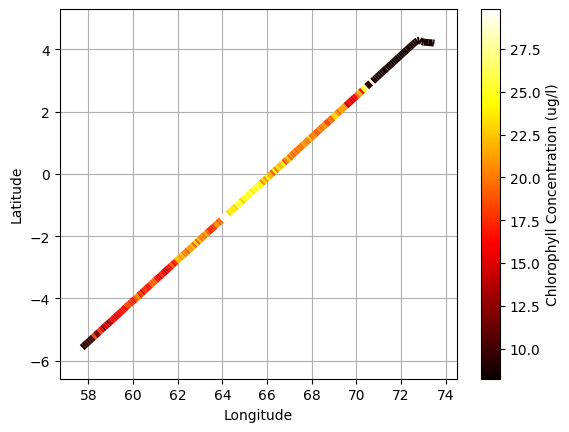

In [69]:
long = merged_data['long']
lat = merged_data['lat']
chloro = merged_data['chloro']

#Plotting of chlorophyll concentration variety along transect
def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """
    data = genfromtxt('twodays_temp.csv', delimiter=',')
    x = long
    y = lat
    z = chloro
    fig, ax = plt.subplots()
    lc = colorline(x, y, z, cmap='hot',norm=plt.Normalize(z.min(),z.max()))
    plt.colorbar(lc, label="Chlorophyll Concentration (ug/l)")
    plt.xlim(x.min()-1, x.max()+1)
    plt.ylim(y.min()-1, y.max()+1)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

def colorline(
        x, y, z=None, cmap='hot', norm=plt.Normalize(0.0, 1.0),
        linewidth=5, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

multicolored_lines()